In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
import visualize
import world_generator
import evaluation
import projections

In [4]:
# enable animations to render inline.
# requires ffmpeg to be installed (`sudo apt install ffmpeg`)
rc('animation', html='html5')

In [5]:
N_a, M_a, g_bas = world_generator.generate_world(num_regions=16, spread_rate=0.2, self_spread_rate=2.0)
# N_a, M_a, g_ba

In [6]:
N_a.shape, M_a.shape, [g_ba.shape for g_ba in g_bas]

((16,), (16, 16), [(4, 16), (1, 4)])

# No Lock-Down

In [7]:
results = evaluation.evaluate(
    M_a,
    projection_method=projections.Projections().sub_matrix_eigenvector,
    g_bas=g_bas,
    N_a_0=N_a,
    num_steps=200,
    intervention_strategy=False)

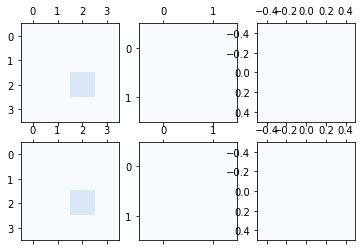

In [8]:
anim = visualize.animate_results(results)

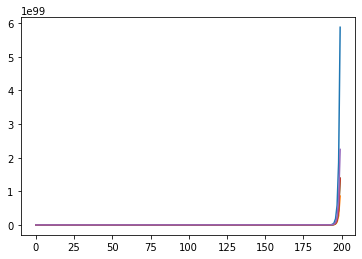

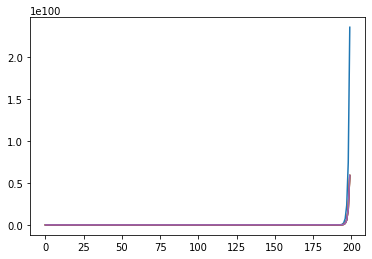

In [9]:
for i in range(len(g_bas)):
    visualize.plot_case_counts(results['N_bs'][i], results['N_bs'][i+1], 0, g_bas[i])

In [10]:
# anim

# Debugging M_b

In [11]:
results['M_bs'][0] == M_a

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  Tru

In [12]:
M_a.shape

(16, 16)

In [22]:
M_a

array([[2. , 0.2, 0. , 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0.2, 2. , 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0.2, 2. , 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0.2, 2. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0.2, 0.2, 0. , 0. , 2. , 0.2, 0. , 0. , 0.2, 0.2, 0. , 0. , 0. ,
        0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0. , 0.2, 2. , 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0. ,
        0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0. , 0.2, 2. , 0.2, 0. , 0.2, 0.2, 0.2, 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0. , 0. , 0.2, 2. , 0. , 0. , 0.2, 0.2, 0. ,
        0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 2. , 0.2, 0. , 0. , 0.2,
        0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. , 0.2, 2. , 0.2, 0. , 0.2,
        0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.

In [13]:
results['M_bs'][1].shape

(4, 4)

In [14]:
M_bs_1, g_ab = projections.Projections().sub_matrix_eigenvector(M_a, g_bas[0], return_g_ab=True)

In [15]:
results['M_bs'][1] == M_bs_1

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [16]:
results['M_bs'][1].shape, M_bs_1.shape

((4, 4), (4, 4))

In [20]:
results['M_bs'][1]

array([[0.65  , 0.05  , 0.05  , 0.0125],
       [0.05  , 0.65  , 0.0125, 0.05  ],
       [0.05  , 0.0125, 0.65  , 0.05  ],
       [0.0125, 0.05  , 0.05  , 0.65  ]])

In [21]:
M_bs_1

array([[2.6 , 0.2 , 0.2 , 0.05],
       [0.2 , 2.6 , 0.05, 0.2 ],
       [0.2 , 0.05, 2.6 , 0.2 ],
       [0.05, 0.2 , 0.2 , 2.6 ]])

In [17]:
g_bas[0].shape

(4, 16)

In [18]:
g_ab

array([[0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.25]])

In [19]:
g_bas[0]

array([[1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.]])

In [27]:
l, v = np.linalg.eig(np.eye(4) * 1.8 + np.ones((4, 4)) * 0.2)
l, v

(array([1.8, 2.6, 1.8, 1.8]),
 array([[-0.8660254 ,  0.5       ,  0.26925559,  0.16691413],
        [ 0.28867513,  0.5       ,  0.68627873, -0.05563804],
        [ 0.28867513,  0.5       , -0.47776716, -0.74948705],
        [ 0.28867513,  0.5       , -0.47776716,  0.63821097]]))

In [34]:
(v[:, 1:2] * l[1]) @ v[:, 1:2].T

array([[0.65, 0.65, 0.65, 0.65],
       [0.65, 0.65, 0.65, 0.65],
       [0.65, 0.65, 0.65, 0.65],
       [0.65, 0.65, 0.65, 0.65]])